# Tracking your Experiments using MLFlow

## Loading the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
cardata = pd.read_csv('data/ToyotaCorolla.csv', encoding='latin1')

In [3]:
print(cardata.shape)

(1436, 38)


## Consider only the below columns and prepare a prediction model for predicting Price.

**Corolla [ "Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight" ]**

* **Price**  -- Offer Price in EUROs
* **Age_08_04** -- Age in months as in August 2004
* **KM** -- Accumulated Kilometers on odometer
* **HP** -- Horse Power
* **cc** -- Cylinder Volume in cubic centimeters
* **Doors** -- Number of doors
* **Gears** -- Number of gear positions
* **Quarterly_Tax** -- Quarterly road tax in EUROs
* **Weight** -- Weight in Kilograms

In [4]:
cardata.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
cardata = cardata[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cardata

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


### Descriptive Analysis

In [6]:
cardata.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### Checking for Data types

In [7]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


### Renaming the columns name and making it short

In [8]:
toyota_corolla = cardata.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota_corolla.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Checking for missing values

In [9]:
toyota_corolla.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

### Checking for Duplicated Values


In [10]:
toyota_corolla[toyota_corolla.duplicated()].shape

(1, 9)

In [11]:
toyota_corolla[toyota_corolla.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
toyota_corolla = toyota_corolla.drop_duplicates().reset_index(drop=True)
toyota_corolla[toyota_corolla.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


#### Observation: There are duplicated values in the dataset Hence, we dropped those values

### Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables

In [13]:
discrete_feature = [feature for feature in toyota_corolla.columns if len(toyota_corolla[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [14]:
continuous_feature = [feature for feature in toyota_corolla.columns if toyota_corolla[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


### Exploratory Data Anlaysis
### Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot

In [15]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(9,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm', plot=pylab)

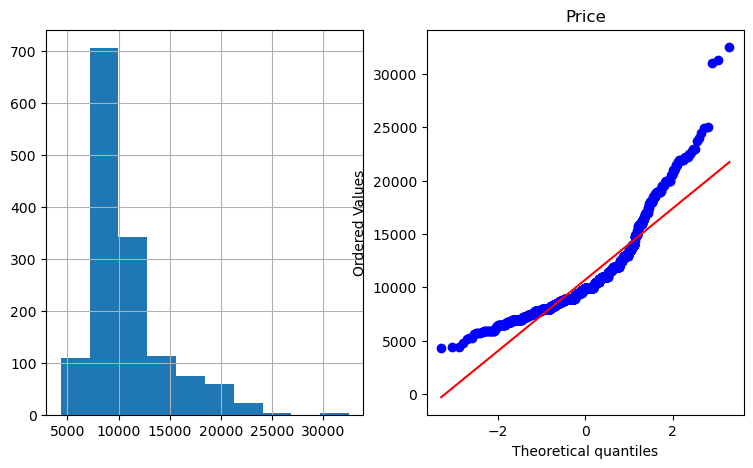

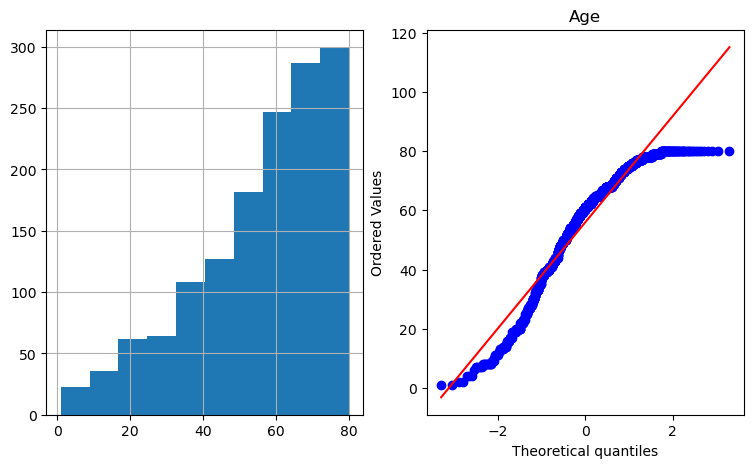

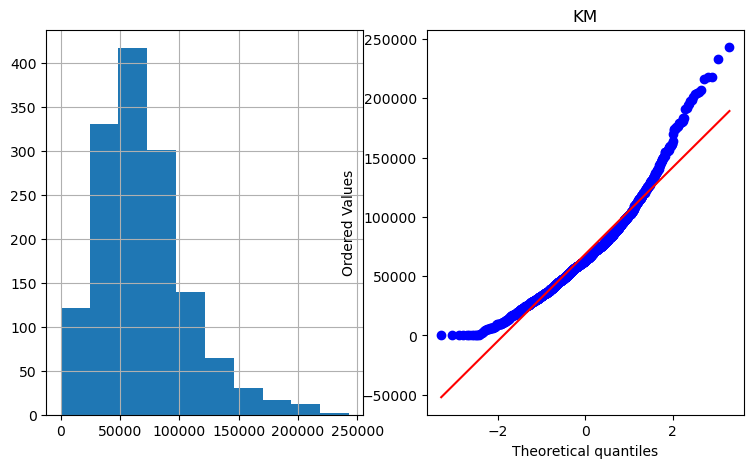

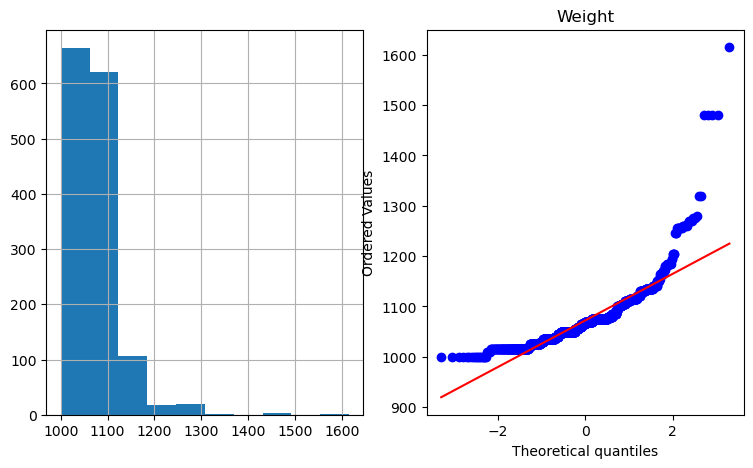

In [16]:
plot_data(toyota_corolla,'Price')
plt.title('Price')
plot_data(toyota_corolla,'Age')
plt.title('Age')
plot_data(toyota_corolla,'KM')
plt.title('KM')
plot_data(toyota_corolla,'Weight')
plt.title('Weight')
plt.show()

### Visualizing the Relation between each independent Feature with respect to the Dependent Feature

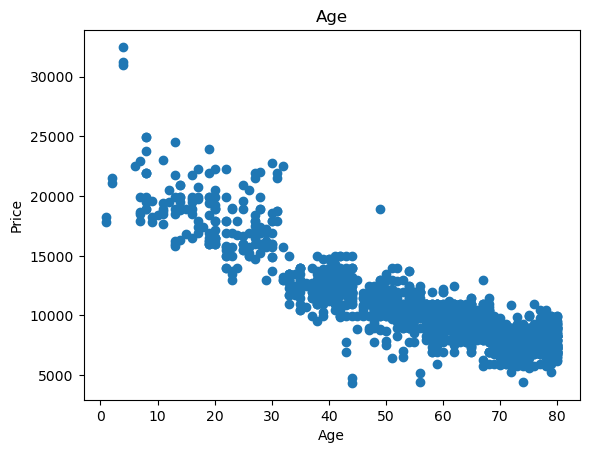

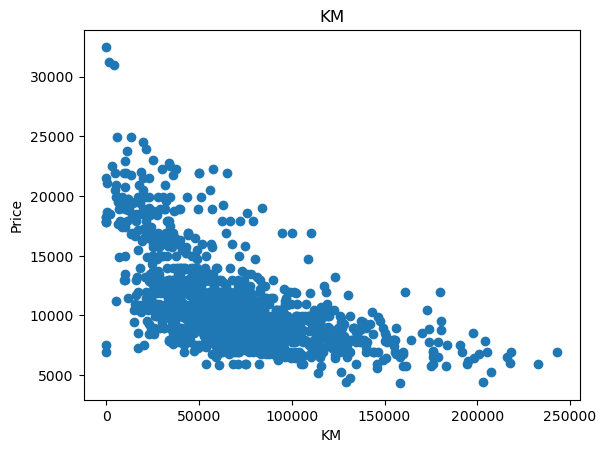

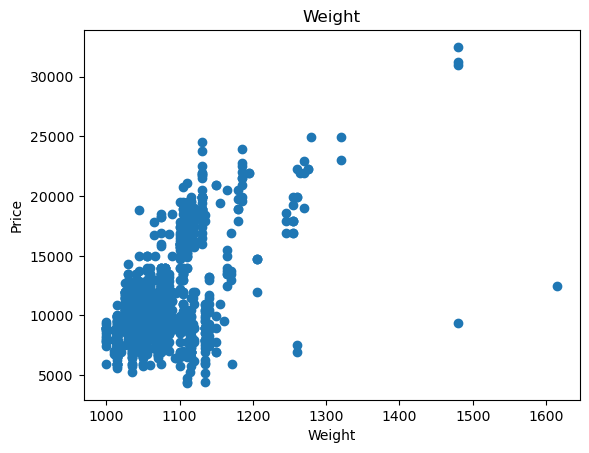

In [17]:
for feature in continuous_feature:
    if feature!="Price":
        df = toyota_corolla.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

#### Observation: Age feature has a good linear relation with Price a Negative Correlation as compare to other features
### Lets analyze the relationship between the discrete variables and Price

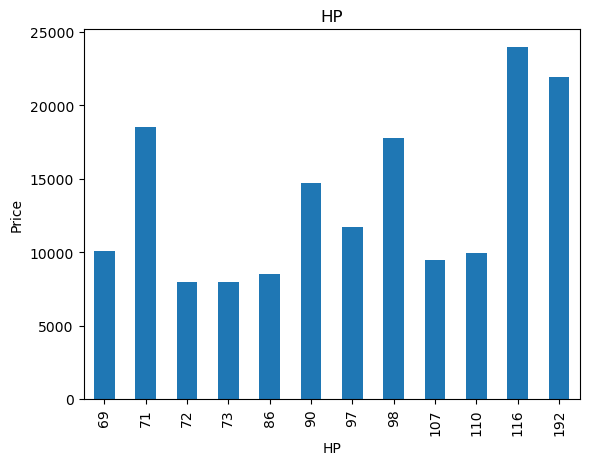

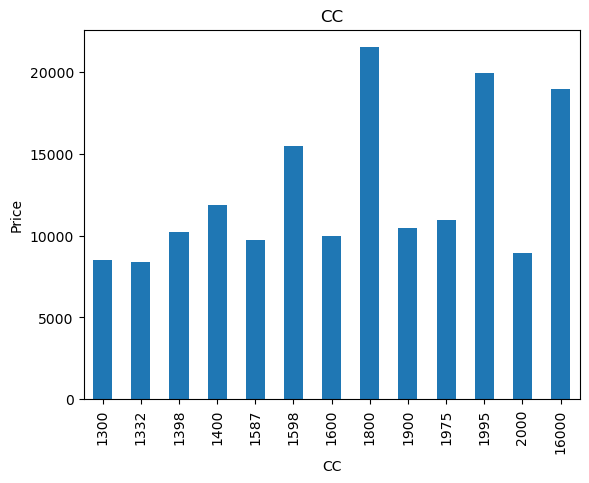

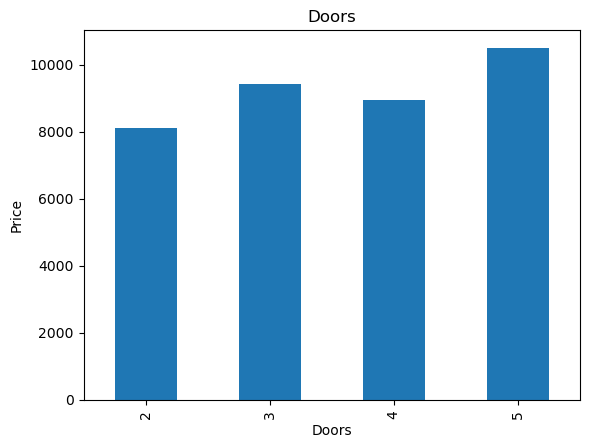

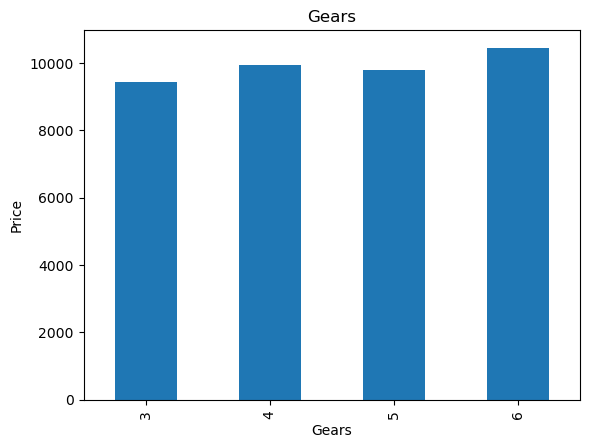

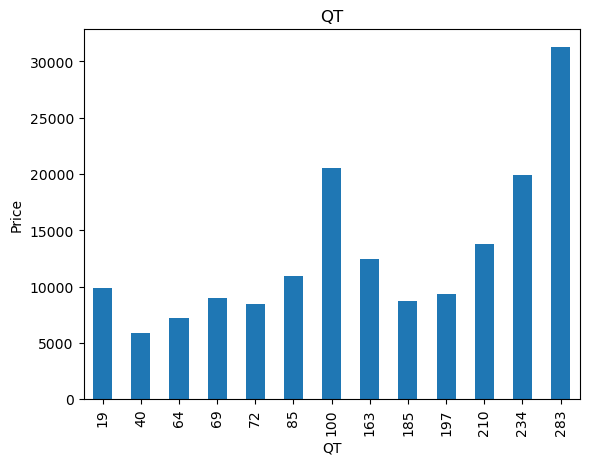

In [18]:
for feature in discrete_feature:
    toyota_corolla = toyota_corolla.copy()
    toyota_corolla.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

#### Observation:There is'nt much of difference between how much Gears and Doors each Car has to have a sginificant amount of changes in Prices from each other and there is'nt any direct relation
### Visualizing Continuous Datatype for Outlier Detection

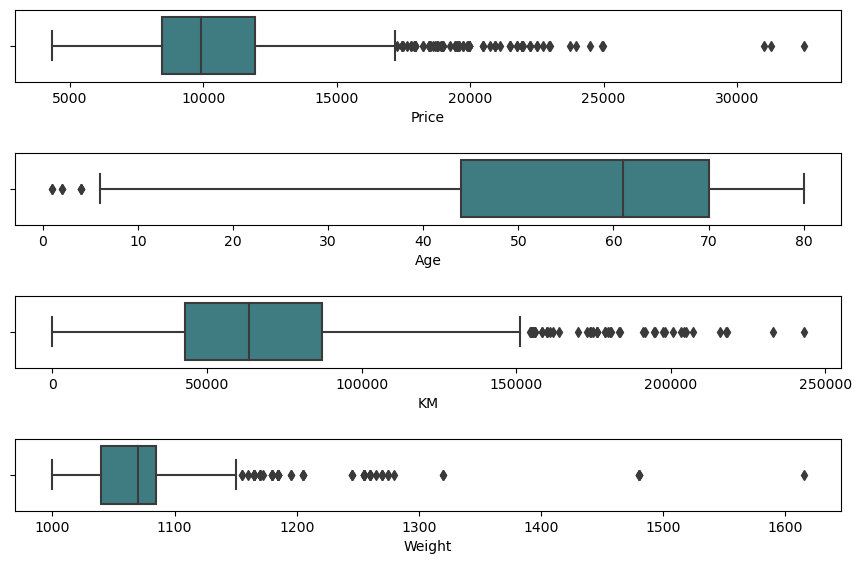

In [19]:
toyota_corolla = toyota_corolla.copy() 
fig, axes=plt.subplots(4,1,figsize=(9,6),sharex=False,sharey=False)
sns.boxplot(x='Price',data=toyota_corolla,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=toyota_corolla,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=toyota_corolla,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=toyota_corolla,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### Observation: A significant amount of outliers are present in each continuous feature
**Note:**

* We can't simply remove the outliers that would mean loss of information
* We need to try different types of transformation or imputation and select the one with the best results
* Note: Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by thr extreme values

**Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case**

### Let's try Median Imputation to handle Outlier in Profit

## Model Building
Model building refers to the process of creating a mathematical or computational representation of a system or phenomenon. This representation, known as a model, is used to simulate, predict, or analyze the behavior of the system or phenomenon under different conditions. The process of building a model typically involves defining the problem, collecting and preprocessing data, selecting an appropriate algorithm or approach, training and validating the model, and deploying it for use. The quality and accuracy of the model depends on various factors such as the quality and quantity of data, the choice of algorithm, and the skill of the model builder.

In [20]:
cardata.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [21]:
X = cardata.drop('Price', axis=1)
y = cardata.Price

In [22]:
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [23]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

## Train Test Split
Train-test split is a common technique used in machine learning to evaluate the performance of a model. It involves splitting the dataset into two separate parts: the training set and the testing set. The training set is used to train the model, and the testing set is used to evaluate its performance on unseen data. By evaluating the performance of the model on the testing set, we can estimate how well the model will generalize to new data. The most common split ratio is 80:20, where 80% of the data is used for training, and 20% is used for testing. However, this ratio can be adjusted based on the size and complexity of the dataset.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [25]:
print("X_train Shape is : ", X_train.shape)
print("X_test Shape is  : ", X_test.shape)
print("y_train Shape is : ", y_train.shape)
print("y_test Shape is  : ", y_test.shape)

X_train Shape is :  (1077, 8)
X_test Shape is  :  (359, 8)
y_train Shape is :  (1077,)
y_test Shape is  :  (359,)


## Data Preprocessing on Training Data

In [26]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)

X_train_rescaled.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
403,-0.383727,1.022845,-0.294503,-0.374160,1.024196,-0.126261,-0.047964,-0.230060
454,-0.329753,0.081026,0.560251,0.044554,-1.070883,-0.126261,-0.047964,-0.034191
1316,1.019579,-0.045662,-1.017756,-0.583516,-0.023343,-0.126261,-0.438010,-1.405276
384,-0.113860,2.119434,-1.938260,0.881981,1.024196,-0.126261,2.389826,1.238960
80,-1.679086,-1.299904,0.560251,30.191928,1.024196,-0.126261,0.317705,2.120371


In [27]:
scaler.var_, scaler.scale_

(array([3.43274904e+02, 1.43014564e+09, 2.31315487e+02, 2.28152908e+05,
        9.11295433e-01, 3.65574100e-02, 1.68270368e+03, 2.60655737e+03]),
 array([1.85276794e+01, 3.78172664e+04, 1.52090594e+01, 4.77653544e+02,
        9.54617951e-01, 1.91199921e-01, 4.10207713e+01, 5.10544550e+01]))

## Preparing Test Data

In [28]:
X_test_rescaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

X_test_rescaled.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
995,0.641766,-0.698829,0.560251,0.044554,-1.070883,-0.126261,-0.438010,-0.425929
514,-0.005914,-0.442385,-0.294503,-0.374160,-1.070883,-0.126261,-0.438010,-0.915603
612,0.156006,2.263654,-1.938260,0.881981,-1.070883,-0.126261,2.389826,0.945156
307,-0.761540,-0.799788,0.560251,0.044554,-1.070883,-0.126261,-0.438010,-0.621799
981,0.048060,-0.639332,0.560251,0.044554,-1.070883,-0.126261,-0.438010,-0.425929


## Introduction to Experiment Tracking
**Terminologies:**
> 1. Experiment  
> 2. Run  
> 3. Metadata  (i.e. Tags, Parameters, Metrics)  
> 4. Artifacts (i.e. Output files associated with experiment runs)

**What do you want to track for each Experiment Run?**
1. Training and Validation Data Used
2. Hyperparameters
3. Metrics
4. Models

**Why Track?**
> Organization
> Optimization
> Reproducibility

**Tool - MLFlow**  
MLFlow helps you to organize your experiments into runs.

**MLFlow keeps track of:**
> Tags  
> Parameters  
> Metrics  
> Models  
> Artifact  
> Source code, Start and End Time, Authors etc..

**Run below mentioned commands to install mlflow on your system:**
```
pip install mlflow
mlflow ui --backend-store-uri sqlite:///mlflow.db
```

## Introduction to MLFlow

**Step 1 - Import MLFlow**
> `import mlflow`

**Step 2 - Set the tracker and experiment**
> `mlflow.set_tracking_uri(DATABASE_URI)`  
> `mlflow.set_experiment("EXPERIMENT_NAME")`

**Step 3 - Start a experiment run**
> `with mlflow.start_run():`

**Step 4 - Logging the metadata**
> `mlflow.set_tag(KEY, VALUE)`  
> `mlflow.log_param(KEY, VALUE)`
> `mlflow.log_metric(KEY, VALUE)`

**Step 5 - Logging the model and other files (2 ways)**
> **Way 1 -** `mlflow.<FRAMEWORK>.log_model(MODEL_OBJECT, artifact_path="PATH")`  
> **Way 2 -** `mlflow.log_artifact(LOCAL_PATH, artifact_path="PATH")`

## Running the Experiment

In [29]:
import mlflow

In [30]:
#mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("Toyoto Car Prediction")

<Experiment: artifact_location='file:///C:/Users/shanu/Innomatics%20Task/MLOPs/mlruns/170744988510937296', creation_time=1684404052034, experiment_id='170744988510937296', last_update_time=1684404052034, lifecycle_stage='active', name='Toyoto Car Prediction', tags={}>

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics

In [32]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))

### Experiment 1 - Training KNN Classifier

In [33]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Shanu")
    mlflow.set_tag("algo", "KNN")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/ToyotaCorolla.csv")
    k = 53
    mlflow.log_param("n_neighbors", k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = knn_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(knn_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

### Experiment 2 - Training Logistic Regression

In [34]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Shanu")
    mlflow.set_tag("algo", "Logit")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/ToyotaCorolla.csv")
    C = 0.1
    mlflow.log_param("C", C)
    lr_classifier = LogisticRegression(C=C)
    lr_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = lr_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(lr_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

### Experiment 3 - Training Naive Bayes

In [35]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Shanu")
    mlflow.set_tag("algo", "GaussianNB")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/ToyotaCorolla.csv")
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = nb_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(nb_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

### Experiment 4 - Training Decision Tree

In [36]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Shanu")
    mlflow.set_tag("algo", "DecisionTree")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/ToyotaCorolla.csv")
    depth = 3
    mlflow.log_param("max_depth", depth)
    dt_classifier = DecisionTreeClassifier(max_depth = depth)
    dt_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = dt_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(dt_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

### Experiment 5 - Training Support Vector Classifier

In [37]:
with mlflow.start_run():
    mlflow.set_tag("dev", "Shanu")
    mlflow.set_tag("algo", "SVM")
    # log the data for each run using log_param, log_metric, log_model
    mlflow.log_param("data-path", "data/ToyotaCorolla.csv")
    C = 0.1
    mlflow.log_param("C", C)
    sv_classifier = SVC(C=C)
    sv_classifier.fit(X_train_rescaled, y_train)
    y_test_pred = sv_classifier.predict(X_test_rescaled)
    acc = metrics.accuracy_score(y_test, y_test_pred)    
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(sv_classifier, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

### Experiment 6 - Training KNN Classifier with Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2]}]

    clf = GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid=tuned_parameters,
                       scoring='accuracy',
                       cv=5,
                       return_train_score=True,
                       verbose=1)
    clf.fit(X_train, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


# THE END !!